In [32]:
import os

print(os.path.abspath(os.curdir))

e:\Data Kuliah\S2 ITS\Semester 6\IEEE Access\DroMoLog


In [5]:
import os
os.chdir("..")

In [6]:
print(os.path.abspath(os.curdir))

e:\Data Kuliah\S2 ITS\Semester 6\IEEE Access\DroMoLog


In [33]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency

def generate_chi_sq(dataset, encoder, dataframe):
    chi2_results = {}
    p_value = {}
    # print(dataframe.columns)
    # Loop through each categorical column (excluding the evaluation score column)
    for column in dataframe.columns:
        if column != 'accuracy':
        # if column != evaluation_score and dataframe[column].dtype == 'object':
            # Create a contingency table
            contingency_table = pd.crosstab(dataframe[column], dataframe['accuracy'])
            
            # Perform the chi-squared test
            chi2, p_val, _, _ = chi2_contingency(contingency_table)
            
            # Store the chi-squared statistic in the dictionary
            chi2_results[column] = chi2
            p_value[column] = p_val
            # chi2_results = {k:[v] for k,v in chi2_results.items()}
            # chi2_results_df = pd.DataFrame([chi2_results])
            # contingency_table.to_excel(f'experiments/analysis/contingency_table_{dataset}_{encoder}_{column}.xlsx')
            # chi2_results_df.to_excel(f'experiments/analysis/chi2_results_{dataset}_{encoder}_{column}.xlsx', index=True)

    # print(f"chi: {chi2_results}")
    # print(f"p_val: {p_value}")
    # print(contingency_table)
    
    # Sort the results by chi-squared statistic in descending order
    sorted_chi2_results = dict(sorted(chi2_results.items(), key=lambda item: item[1], reverse=True))

    # Plot the chi-squared statistics
    plt.figure(figsize=(6, 4))
    sns.barplot(x=list(sorted_chi2_results.keys()), y=list(sorted_chi2_results.values()))
    plt.xticks(rotation=90)
    plt.xlabel('Categorical Columns')
    plt.ylabel('Chi-squared Statistic')
    plt.title(f'Chi-squared Test for {dataset}-{encoder} vs. Accuracy')
    # plt.savefig(os.path.join('visualizations/chi-square', f"{dataset}_{encoder}.pdf"), bbox_inches='tight')
    # plt.show()
    plt.close()
    return chi2_results, p_value

In [34]:
import collections
# Load your dataset into a pandas DataFrame
# Replace 'your_dataset.csv' with the actual file path
data = pd.read_excel('experiments/recap/final-recap-all.xlsx')
# print(data)
# data_filtered = data[data['dataset'] == 'fold5']
# data_unfiltered = data[data['dataset'] == 'unfiltered']
encoders = list(set(data['encoder'].to_list()))
datasets = list(set(data['dataset'].to_list()))
# Specify the evaluation score you want to analyze (e.g., 'accuracy' or 'f1_score')
evaluation_score = 'accuracy'
recap_chi = collections.defaultdict(dict)
# print(f'data: {len(data)}')
# Bisa diganti line plot buat dua garis aja untuk filtered and unfiltered dataset.
# Initialize an empty dictionary to store chi-squared test results
for dataset in datasets:
    data_dataset = data[data['dataset'] == dataset]
    # print(f'data_dataset: {len(data_dataset)}')
    for encoder in encoders:
        exclude_cols = ['recall', 'precision', 'f1_score', 'best_epoch', 'dataset', 'confidence_avg', 'confidence_std']
        data_encoder = data_dataset[data_dataset['encoder'] == encoder]
        # print(f'data_encoder: {len(data_encoder)}')
        data_ready = data_encoder.drop(exclude_cols, axis=1)
        chi2_results, p_value = generate_chi_sq(dataset, encoder, data_ready)
        # print(f'dataset: {dataset}, encoder: {encoder}')
        # print(f'chi2_results: {chi2_results}, p_value: {p_value}')
        # print(f'data_ready: \n{data_ready}')
        joined_string = dataset + '_' + encoder
        # for key, value in chi2_results.items():
        #     recap_chi[joined_string][key]['chi'] = value
        # for key, value in p_value.items():
        #     recap_chi[joined_string][key]['p_value'] = value
        recap_chi[dataset][encoder] = {'chi': chi2_results, 'p_value': p_value}
# recap_chi

In [35]:
def nested_dict():
   return collections.defaultdict(nested_dict)
restructured_list = []
restructured = nested_dict()
for dataset, values in recap_chi.items():
    for encoder, chis in values.items():
        # print(f'chi: {chis.items()}')
        hyperparams = []
        chi_score = []
        p_score = []
        if encoder == 'none' or encoder == 'linear':
            encoder = 'None'
        elif len(encoder) < 5:
            encoder = str.upper(encoder)
        else:
            encoder = 'Trans'
        dataset_short = 'F' if dataset =='filtered' else 'U'
        dataset_encoder = dataset_short + '-' + encoder
        for chi, variables in chis.items():
            if chi == 'chi':
                for variable, value in variables.items():
                    if variable == 'encoder':
                        continue
                    hyperparams.append(variable)
                    chi_score.append(value)
                    # restructured[dataset_encoder][variable]['chi'] = value
            else:
                for variable, value in variables.items():
                    if variable == 'encoder':
                        continue
                    p_score.append(value)
                    # restructured[dataset_encoder][variable]['p_value'] = value
                    # print(f'dataset: {dataset}, encoder: {encoder}, chi: {chi}, variable: {variable}, value: {value}')
        for i in range(0, len(hyperparams)):
            restructured_list.append([dataset_encoder, hyperparams[i], chi_score[i], round(p_score[i], 2)])
print(restructured_list)

[['U-LSTM', 'n_layer', 39.165398704822174, 0.01], ['U-LSTM', 'n_head', 0.0, 1.0], ['U-LSTM', 'bidirectional', 5.681834396798168, 0.89], ['U-LSTM', 'pooling', 33.959684931185805, 0.05], ['U-LSTM', 'class_weight', 31.874823133296452, 0.08], ['U-LSTM', 'scenario', 37.443398130156936, 0.02], ['U-GRU', 'n_layer', 17.26305683563748, 0.37], ['U-GRU', 'n_head', 0.0, 1.0], ['U-GRU', 'bidirectional', 16.78873527905786, 0.03], ['U-GRU', 'pooling', 21.35483870967742, 0.17], ['U-GRU', 'class_weight', 24.080568356374812, 0.09], ['U-GRU', 'scenario', 12.509139784946235, 0.71], ['U-Trans', 'n_layer', 35.062372263470415, 0.02], ['U-Trans', 'n_head', 18.189234426022345, 0.57], ['U-Trans', 'bidirectional', 0.0, 1.0], ['U-Trans', 'pooling', 40.64631971152219, 0.0], ['U-Trans', 'class_weight', 45.34678671192056, 0.0], ['U-Trans', 'scenario', 34.36893225019512, 0.02], ['U-None', 'n_layer', 0.0, 1.0], ['U-None', 'n_head', 0.0, 1.0], ['U-None', 'bidirectional', 0.0, 1.0], ['U-None', 'pooling', 20.721428571428

In [36]:
def transform_cols(column):
    if column == 'n_layer':
        return 'Num. Layer'
    elif column == 'n_head':
        return 'Num. Head'
    elif column == 'bidirectional':
        return 'Bidirectional'
    elif column == 'pooling':
        return 'Pooling'
    elif column == 'scenario':
        return 'Loss Function'
    elif column == 'class_weight':
        return 'Class Weight'
    elif column == 'confidence_avg':
        return 'Confidence'

In [37]:
import pandas as pd

akhirnya_df = pd.DataFrame(restructured_list, columns=['Dataset-Encoder', 'Hyperparameter', 'chi-score', 'p-value'])
akhirnya_df['Hyperparameter'] = akhirnya_df['Hyperparameter'].apply(transform_cols)
akhirnya_df.to_excel('experiments/analysis/chi_square_test.xlsx', index=False)

Hyperparameter   Bidirectional  Class Weight  Loss Function  Num. Head  \
Dataset-Encoder                                                          
F-GRU                18.508163     47.064587      27.250687   0.000000   
F-LSTM                9.578509     17.909931      13.435345   0.000000   
F-None                0.000000      8.000000      11.666667   0.000000   
F-Trans               0.000000     48.903101      17.063735  24.338731   
U-GRU                16.788735     24.080568      12.509140   0.000000   
U-LSTM                5.681834     31.874823      37.443398   0.000000   
U-None                0.000000     14.335714      17.228571   0.000000   
U-Trans               0.000000     45.346787      34.368932  18.189234   

Hyperparameter   Num. Layer    Pooling  
Dataset-Encoder                         
F-GRU             25.556520  11.045185  
F-LSTM             7.540209  23.847123  
F-None             0.000000  14.750000  
F-Trans           43.978915  50.727193  
U-GRU        

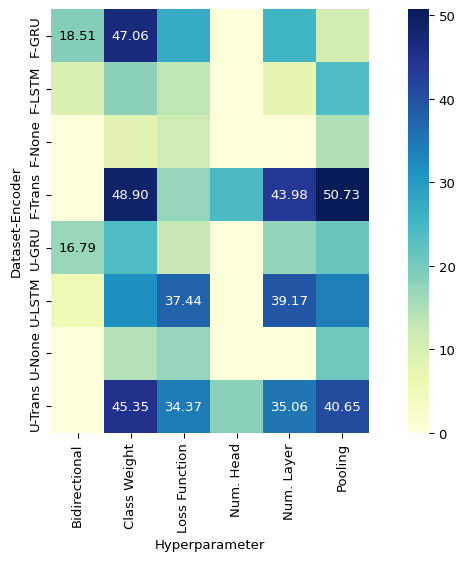

In [67]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
# matplotlib.rcParams['font.family'] = 'Times New Roman'
matplotlib.rcParams['font.size'] = 9.5
# Sample data
# data = {
#     'encoder': ['enc1', 'enc1', 'enc2', 'enc2', 'enc3', 'enc3', 'enc4', 'enc4', 'enc5', 'enc5', 'enc6', 'enc6', 'enc7', 'enc7', 'enc8', 'enc8'],
#     'hyperparam': ['var1', 'var2', 'var1', 'var2', 'var1', 'var2', 'var1', 'var2', 'var1', 'var2', 'var1', 'var2', 'var1', 'var2', 'var1', 'var2'],
#     'chi-score': [10.5, 15.2, 8.9, 12.8, 9.4, 14.6, 11.7, 16.3, 7.8, 13.5, 10.1, 15.8, 9.9, 14.0, 12.3, 17.1],
#     'p-value': [0.001, 0.0001, 0.002, 0.0002, 0.0015, 0.00005, 0.0012, 0.00009, 0.0023, 0.00008, 0.0011, 0.00012, 0.0014, 0.00007, 0.00015, 0.00004]
# }
# data = {
#     'encoder': akhirnya_df['encoder'].to_list(),
#     'hyperparam': akhirnya_df['hyperparam'].to_list(),
#     'chi-score': akhirnya_df['chi-score'].to_list(),
#     'p-value': akhirnya_df['p-value'].to_list()
# }

df = akhirnya_df.copy()
# df = pd.DataFrame(data)
# print(df)
# Pivot the DataFrame to create a matrix
# heatmap_data = df.pivot("encoder", "variables", "chi-score")
heatmap_chi = df.pivot(index='Dataset-Encoder', columns='Hyperparameter', values='chi-score')
heatmap_p = df.pivot(index='Dataset-Encoder', columns='Hyperparameter', values='p-value')
print(heatmap_chi)
print(heatmap_p)
# print(heatmap_data.shape)
# Create a heatmap with p-values as labels
plt.figure(figsize=(10, 5.5))
# ax = sns.heatmap(heatmap_data, annot=df.pivot(index="Dataset-Encoder", columns="Hyperparameter", values="p-value"), cmap="YlGnBu", fmt=".2f", cbar=True, square=True)
ax = sns.heatmap(heatmap_chi, cmap="YlGnBu", fmt=".2f", cbar=True, square=True)
for i in range(heatmap_p.shape[0]):
    for j in range(heatmap_p.shape[1]):
        if heatmap_p.iloc[i, j] < 0.05:
            if heatmap_chi.iloc[i, j] < 30:
                plt.text(j + 0.5, i + 0.5, f"{heatmap_chi.iloc[i, j]:.2f}", ha="center", va="center")
            else:
                plt.text(j + 0.5, i + 0.5, f"{heatmap_chi.iloc[i, j]:.2f}", ha="center", va="center", color="white")
# plt.title("Chi-Square Test Results by Variable and Encoder")
plt.savefig(os.path.join('visualization', "categorical_hyperparams-time.pdf"), bbox_inches='tight')
plt.show()
plt.close()


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
# matplotlib.rcParams['font.family'] = 'Times New Roman'
matplotlib.rcParams['font.size'] = 9.5
# Sample data
# data = {
#     'encoder': ['enc1', 'enc1', 'enc2', 'enc2', 'enc3', 'enc3', 'enc4', 'enc4', 'enc5', 'enc5', 'enc6', 'enc6', 'enc7', 'enc7', 'enc8', 'enc8'],
#     'hyperparam': ['var1', 'var2', 'var1', 'var2', 'var1', 'var2', 'var1', 'var2', 'var1', 'var2', 'var1', 'var2', 'var1', 'var2', 'var1', 'var2'],
#     'chi-score': [10.5, 15.2, 8.9, 12.8, 9.4, 14.6, 11.7, 16.3, 7.8, 13.5, 10.1, 15.8, 9.9, 14.0, 12.3, 17.1],
#     'p-value': [0.001, 0.0001, 0.002, 0.0002, 0.0015, 0.00005, 0.0012, 0.00009, 0.0023, 0.00008, 0.0011, 0.00012, 0.0014, 0.00007, 0.00015, 0.00004]
# }
# data = {
#     'encoder': akhirnya_df['encoder'].to_list(),
#     'hyperparam': akhirnya_df['hyperparam'].to_list(),
#     'chi-score': akhirnya_df['chi-score'].to_list(),
#     'p-value': akhirnya_df['p-value'].to_list()
# }

df = akhirnya_df.copy()
# df = pd.DataFrame(data)
# print(df)
# Pivot the DataFrame to create a matrix
# heatmap_data = df.pivot("encoder", "variables", "chi-score")
heatmap_data = df.pivot(index='Dataset-Encoder', columns='Hyperparameter', values='p-value')


# Create a heatmap with p-values as labels
plt.figure(figsize=(10, 5.5))
ax = sns.heatmap(heatmap_data, annot=df.pivot(index="Dataset-Encoder", columns="Hyperparameter", values="p-value"), cmap="YlGnBu", fmt=".2f", cbar=True, square=True)
# plt.title("Chi-Square Test Results by Variable and Encoder")
# plt.savefig(os.path.join('visualization', "categorical_hyperparams-time.pdf"), bbox_inches='tight')
plt.show()
plt.close()


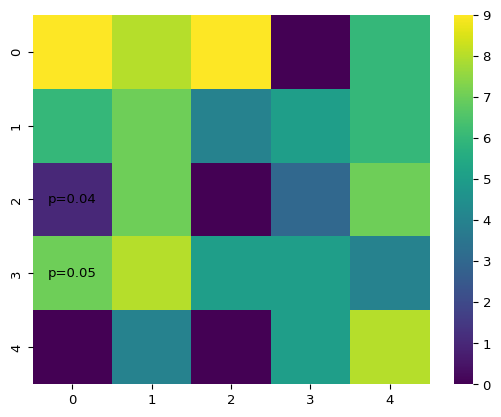

In [47]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Generate example data
data = np.random.randint(0, 10, size=(5, 5))
p_values = np.random.rand(5, 5)  # Example p-values

# Plot heatmap
sns.heatmap(data, fmt="d", cmap="viridis")

# Annotate cells with p-values < 0.05
for i in range(data.shape[0]):
    for j in range(data.shape[1]):
        if p_values[i, j] < 0.05:
            plt.text(j + 0.5, i + 0.5, f"p={p_values[i, j]:.2f}", ha="center", va="center")

plt.show()
plt.close()

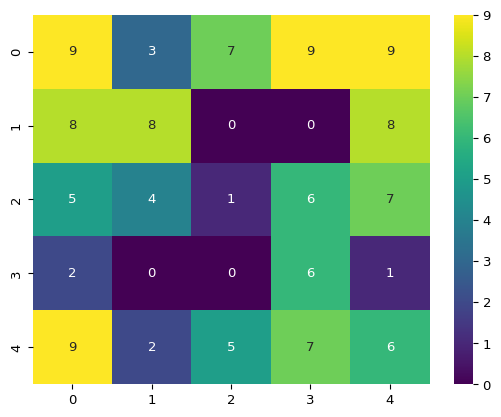

In [44]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Generate example data
data = np.random.randint(0, 10, size=(5, 5))
p_values = np.random.rand(5, 5)  # Example p-values

# Plot heatmap
sns.heatmap(data, annot=True, cmap="viridis")

# Annotate cells with p-values < 0.05
for i in range(data.shape[0]):
    for j in range(data.shape[1]):
        if p_values[i, j] < 0.05:
            plt.text(j + 0.5, i + 0.5, f"p={p_values[i, j]:.2f}", ha="center", va="center")
        else:
            plt.text(j + 0.5, i + 0.5, " ", ha="center", va="center")

plt.show()
plt.close()